In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv('./voice.csv')
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [55]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [56]:
df.shape

(3168, 21)

In [57]:
df.isnull().values.any()

False

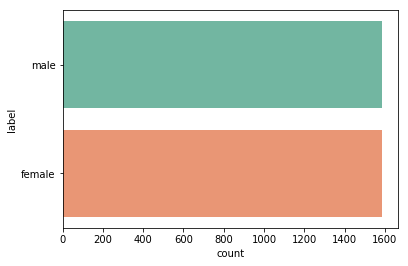

In [59]:
#lets plot count plot for label
sns.countplot(y=df['label'],palette='Set2')

C:\Users\Mr.Khan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


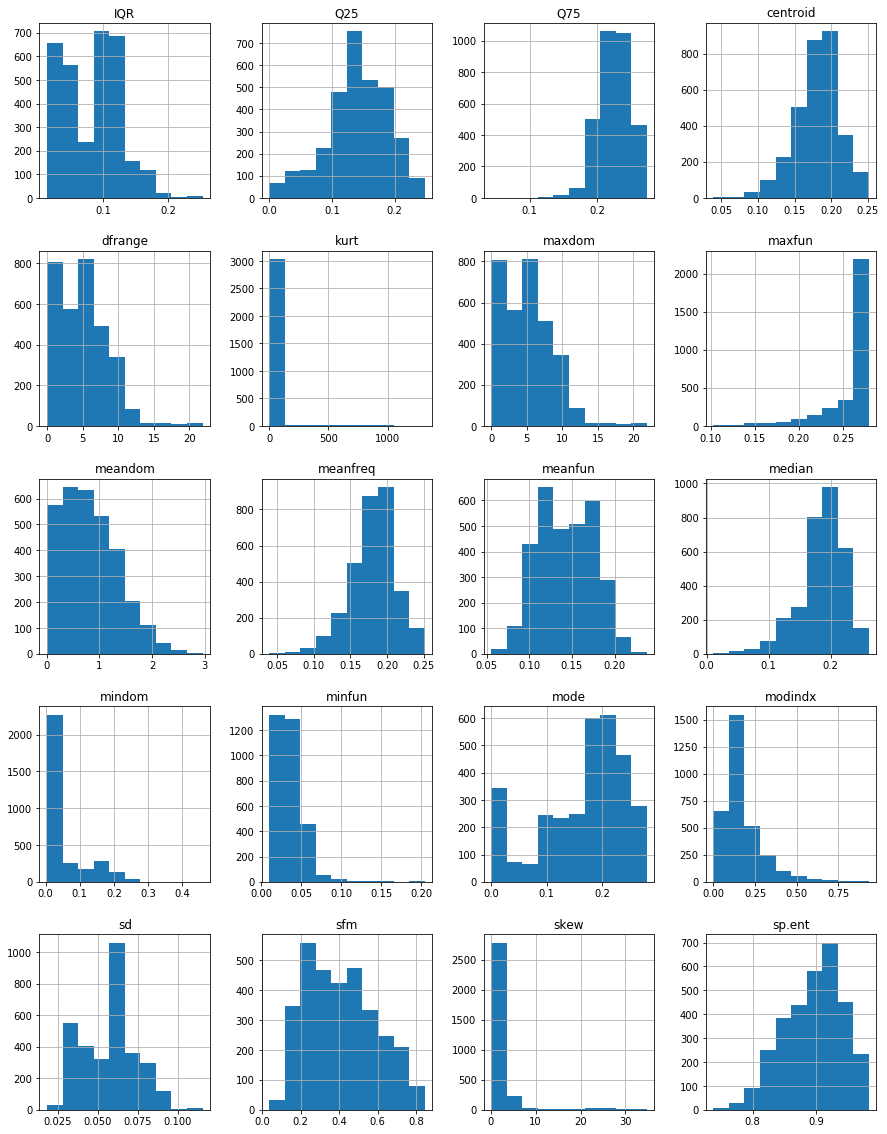

In [61]:
#lets see data distribution
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

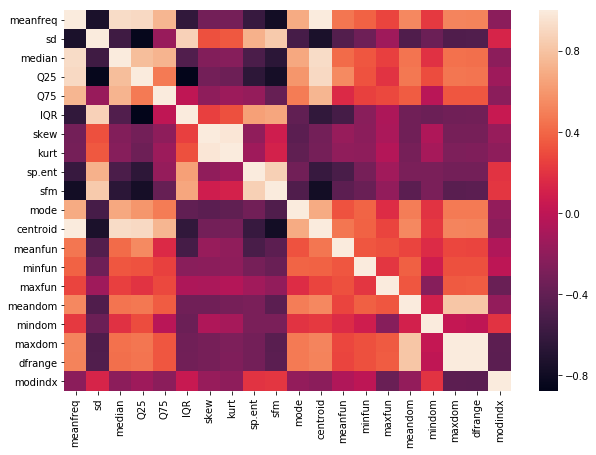

In [72]:
#correlation matrix
fig = plt.figure(figsize = (10,7))
ax = fig.gca()
sns.heatmap(df.corr(),ax=ax)

#in correlation matrix we can see relation between attributes are negative

In [73]:
#extract features and labels
df=df.sample(frac=1)
X=df.iloc[:,:20]
y=df['label']

In [74]:
#lets convert the labels into unique integer
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=lbl.fit_transform(y)
y
#male convert to 1
#female convert to 0

array([0, 0, 1, ..., 0, 1, 1])

In [75]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [76]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2534, 20), (634, 20), (2534,), (634,))

In [127]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

#accuracy and roc curve
acc_scores=[]
roc_scores=[]

clf=LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_scores.append(accuracy_score(y_test,y_pred))
roc_scores.append(roc_auc_score(y_test,y_pred))
acc_scores[0],roc_scores[0]

#pd.DataFrame(data={'Actual':y_test,'Predict':y_pred}).head

C:\Users\Mr.Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9148264984227129, 0.9176274634963697)

In [128]:
#Support Vector 
from sklearn.svm import SVC

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_scores.append(accuracy_score(y_test,y_pred))
roc_scores.append(roc_auc_score(y_test,y_pred))
acc_scores[1],roc_scores[1]
#pd.DataFrame(data={'Actual':y_test,'Predict':y_pred}).head

(0.9290220820189274, 0.9316304954919014)

In [129]:
#Naivye Bayes
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_scores.append(accuracy_score(y_test,y_pred))
roc_scores.append(roc_auc_score(y_test,y_pred))
acc_scores[2],roc_scores[2]
#pd.DataFrame(data={'Actual':y_test,'Predict':y_pred}).head

(0.9037854889589906, 0.904242799010612)

In [130]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_scores.append(accuracy_score(y_test,y_pred))
roc_scores.append(roc_auc_score(y_test,y_pred))
acc_scores[3],roc_scores[3]
#pd.DataFrame(data={'Actual':y_test,'Predict':y_pred}).head

(0.9763406940063092, 0.9763624032554057)

In [131]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=33,algorithm='ball_tree')
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_scores.append(accuracy_score(y_test,y_pred))
roc_scores.append(roc_auc_score(y_test,y_pred))
acc_scores[4],roc_scores[4]
#pd.DataFrame(data={'Actual':y_test,'Predict':y_pred}).head

(0.6861198738170347, 0.6881831963616054)

In [132]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
y_pred=clf.predict(X_test)
acc_scores.append(accuracy_score(y_test,y_pred))
roc_scores.append(roc_auc_score(y_test,y_pred))
acc_scores[5],roc_scores[5]
#pd.DataFrame(data={'Actual':y_test,'Predict':y_pred}).head

#wow.....98%
#Random forest has the highgest accuracy

(0.9873817034700315, 0.9875029921008537)

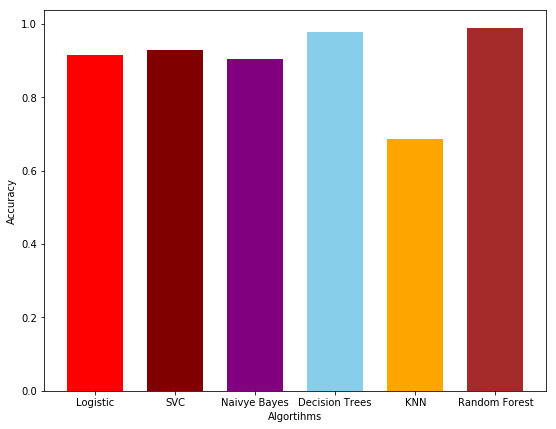

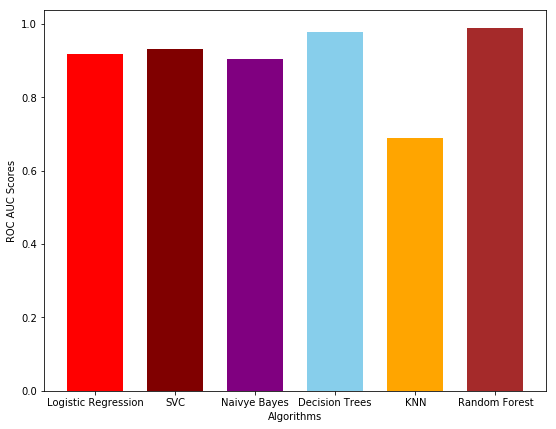

In [133]:
fig = plt.figure(figsize = (9,7))
ax = fig.gca()
plt.bar(['Logistic','SVC','Naivye Bayes','Decision Trees','KNN','Random Forest'],acc_scores,width=0.7,color=('Red','Maroon','Purple','SkyBlue','Orange','Brown'))
plt.xlabel('Algortihms')
plt.ylabel('Accuracy')
plt.show()


fig = plt.figure(figsize = (9,7))
ax = fig.gca()
plt.bar(['Logistic Regression','SVC','Naivye Bayes','Decision Trees','KNN','Random Forest'],roc_scores,width=0.7,color=('Red','Maroon','Purple','SkyBlue','Orange','Brown'))
plt.xlabel('Algorithms')
plt.ylabel('ROC AUC Scores')
plt.show()

In [ ]:
#Random forest classifire is the best model
